### Questions to answer
* What is the percentage of no-show?
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
* Is the time gender related to whether a patient will show or not?
* Are patients with scholarship more likely to miss their appointment?
* Are patients who don't recieve sms more likely to miss their appointment?
* Is the time difference between the scheduling and appointment related to whether a patient will show?
* Does age affect whether a patient will show up or not?
* What is the percentage of patients missing their appointments for every neighbourhood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/ddj99/Downloads/medical.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
## Loading the dataset and checking the columns we have

### Load your data and print out a few lines. Perform operations to inspect data
### Types and look for instances of missing or possibly errant data.


df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.shape

(110527, 14)

In [5]:
pd.DataFrame(df.dtypes)

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
### Types and look for instances of missing or possibly errant data.

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [9]:
### Check if there is any duplicated rows in our data

df.duplicated().sum()

0

### Data Cleaning
* Drop irrelevant columns
* Modify column names
* Correct data types
* Invert no-show column in to show with integer values
* Create a new column for days difference between scheduling an appointment

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.drop(['PatientId','AppointmentID'],axis = 1,inplace = True)

In [12]:
### Change all cloumns name to lower case and replace all - with _


df.rename(columns = lambda x:x.replace('-','_'),inplace=True)

df.columns = df.columns.str.lower()

df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
### Change data columns to data type

df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [24]:
df.scheduledday,df.appointmentday

(0        2016-04-29 18:38:08+00:00
 1        2016-04-29 16:08:27+00:00
 2        2016-04-29 16:19:04+00:00
 3        2016-04-29 17:29:31+00:00
 4        2016-04-29 16:07:23+00:00
                     ...           
 110522   2016-05-03 09:15:35+00:00
 110523   2016-05-03 07:27:33+00:00
 110524   2016-04-27 16:03:52+00:00
 110525   2016-04-27 15:09:23+00:00
 110526   2016-04-27 13:30:56+00:00
 Name: scheduledday, Length: 110527, dtype: datetime64[ns, UTC],
 0        2016-04-29 00:00:00+00:00
 1        2016-04-29 00:00:00+00:00
 2        2016-04-29 00:00:00+00:00
 3        2016-04-29 00:00:00+00:00
 4        2016-04-29 00:00:00+00:00
                     ...           
 110522   2016-06-07 00:00:00+00:00
 110523   2016-06-07 00:00:00+00:00
 110524   2016-06-07 00:00:00+00:00
 110525   2016-06-07 00:00:00+00:00
 110526   2016-06-07 00:00:00+00:00
 Name: appointmentday, Length: 110527, dtype: datetime64[ns, UTC])

In [19]:
df.rename(columns = {'no_show':'show'},inplace=True)

df.show = df.show.map({'No':1,'Yes':0})

In [21]:
df.show.unique()

array([1, 0], dtype=int64)

In [26]:
### Create a new column for days difference between scheduling and appointment
df['day_diff'] = (df.appointmentday.dt.date - df.scheduledday.dt.date).dt.days
df['day_diff']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: day_diff, Length: 110527, dtype: int64

In [33]:
col = df.pop('day_diff')
df.insert(3,'day_diff',col)

In [34]:
df

,gender,scheduledday,appointmentday,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [35]:
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
show                            int64
dtype: object

### Exploratory Data Analysis

In [48]:
#define function to get the ratio of show in different categories

def ratio(x):
    df.groupby(x).show.mean().plot(kind = 'bar')
    display(df.groupby(x)[['show']].mean())


In [49]:
#get some statistics about our data
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


,show
show,
0,22319
1,88208


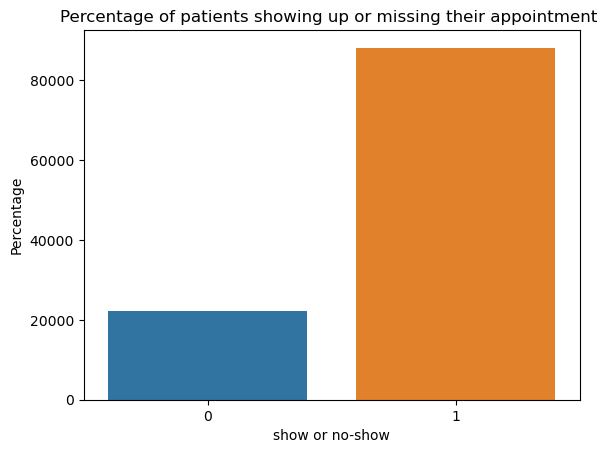

In [54]:
# percentage of show and no show

sns.countplot(df,x=df['show'])
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show')
display(df.groupby('show')[['show']].count())

In [58]:
#create filters for show and no-show

show = (df['show'] == 1)
no_show = (df['show'] == 0)
total_miss = len(no_show)
total = len(df)

### Is the time gender related to whether a patient will show or not?

In [66]:
no_show_gender = df['gender'][df['show'] == 0].value_counts()
show_gender = df['gender'][df['show'] == 1].value_counts()

Text(0.5, 1.0, 'patients who missed their appointment by gender')

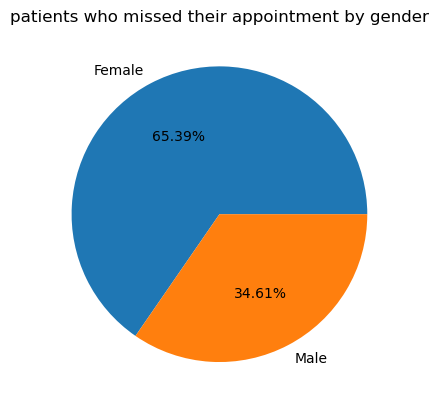

In [75]:

plt.pie(no_show_gender,labels =['Female','Male'],autopct = '%.2f%%')
plt.title('patients who missed their appointment by gender')

### Finding
The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.

### Are patients with scholarships more likely to miss their appointment?

In [76]:
df['scholarship'] == 1

,gender,scheduledday,appointmentday,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,35,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,35,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,41,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,41,38,MARIA ORTIZ,0,0,0,0,0,1,1


,show
scholarship,
0,0.801928
1,0.762637


Text(0.5, 1.0, 'Ratio of show or no-show by scholarship')

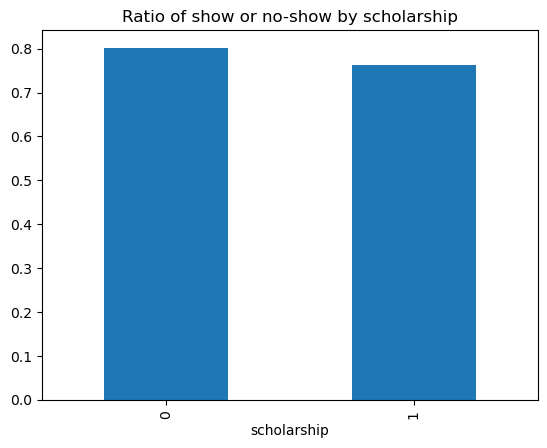

In [78]:
ratio(df.scholarship)
plt.title('Ratio of show or no-show by scholarship')

### Finding
* It seems that patients with scholarships are actually more likely to miss their appointment

### Are patients with hypertension more likely to miss their appointment?

,show
hipertension,
0,0.790963
1,0.826980


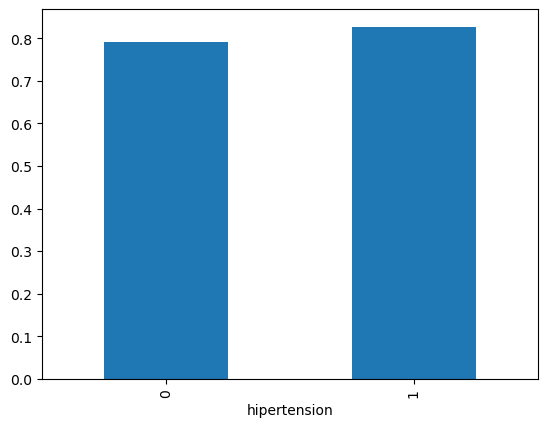

In [81]:
ratio(df.hipertension)

### Finding
* It seems that patients with hypertension are actually more likely to show up for their appointment

,show
sms_received,
0,0.832967
1,0.724255


Text(0.5, 1.0, 'Ratio of show or no-show by sms_received')

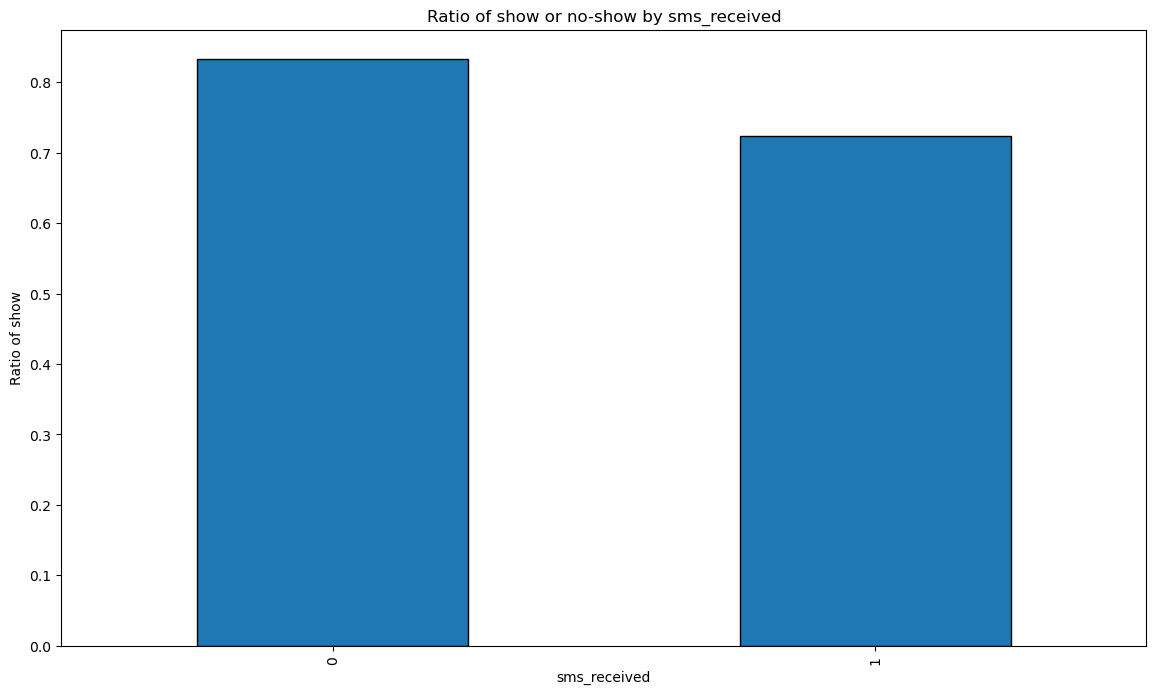

In [85]:
#what is the percentage of patient who attended their appointment by sms_received

plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received')

### Finding
* A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!

### Does age affect whether a patient will show up or not?

Text(0.5, 1.0, 'Histogram of age values for patients who showed up or missed their appointment')

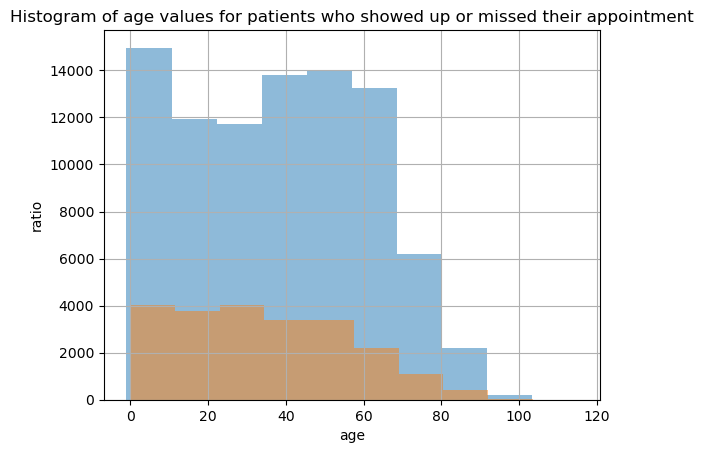

In [103]:
df['age'][df['show'] == 1].hist(alpha=0.5)
df['age'][df['show'] == 0].hist(alpha=0.5)
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')

### Finding
* There is no clear relation between the age and whether the patient shows up or not but younger patients are more likely to miss their appointments.

### What is the percentage of patients missing their appointments for every neighborhood?

In [126]:
neigh_show = df. neighbourhood[df.show == 1].value_counts()
neigh_no_show=df. neighbourhood[df.show == 0].value_counts()

percent_miss_appoin = (neigh_no_show/df['neighbourhood'].value_counts())*100
percent_miss_appoin.to_frame().sort_values(by = 'neighbourhood',ascending = False)

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,100.000000
SANTOS DUMONT,28.918495
SANTA CECÍLIA,27.455357
SANTA CLARA,26.482213
ITARARÉ,26.266363
...,...
SOLON BORGES,14.712154
MÁRIO CYPRESTE,14.555256
AEROPORTO,12.500000
ILHA DO BOI,8.571429


In [124]:
percent_miss_appoin['ILHAS OCEÂNICAS DE TRINDADE']

100.0

### Conclusions
* After analyzing the dataset here are some findings:
* Percentage of patients who didn't show up for their appointment is 20.19%.
* The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
* It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
* It seems that patients with scholarships are actually more likely to miss their appointment.
* A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
* There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.
* Analysis Shortcoming & Data Limitations
* The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
* The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
* The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
* When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.